
## Portfolio Assignment week 01

Study the Tutorial tutorial_cluster_scanpy_object and the tutorial_Clustering_Methods

Write a brief summary about the following:

-	What are common preprocessing steps? Explain for each step why and when you should execute this step and when not.
-	What visualization methods are used in the cluster methods tutorial? Explain why the selected method is the most appropriate method for the visualization. Bonus points: do this as well for the scanpy tutorial.
-	What performance/evaluation metrics are in the cluster methods tutorial? Explain why the used methods are the most appropriate method for the evaluation.


Bonus:
You practice the steps yourself with the breast_cancer dataset (clustering_data.csv)

#### 1:
        Scaling the data.
        Checking for NAN
        Checking if there is a column for colouring
        Understading the data what does each column mean
        Checking the typess

#### 2:
        kmeans is what they use. reason might be that we want to see which wine type cluster to gather based on location
        for the scanpy tutorial PCA is used reason is that we want to cluster based on similarity of the columns and than uses the nearest neigbor to cluster.
        this is one way of doing it because pont that are closer togheter will be seen as a cluster

#### 3:

## Breast cancer dataset

The data set That I will be using is gathered from kaggle.
link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

The information is composed of A digitized image of a fine needle aspirate (FNA) of a breast mass is used to compute features. They describe the properties of the cell nuclei depicted in the image.




In [1]:
# needed  modules
import pandas as pd
from sklearn.decomposition import PCA
import yaml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
import seaborn as sns 


In [2]:
# load the data in with the config file
with open("config.yml") as config:
    input_files = yaml.safe_load(config)
    df = pd.read_csv(input_files["cancer"])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data inspectation

In [3]:
amount_na= {}
# check shape
print(f"columns in the dataframe:{df.shape[1]}. Amount of rows {df.shape[0]}.")
print(df.dtypes)
# check na
for col in df.columns:
    amount_na[col] = df[col].isna().sum()
sorted_amount_na = sorted(amount_na.items(), key=lambda x:x[1], reverse=True)
print(sorted_amount_na)


columns in the dataframe:33. Amount of rows 569.
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compac

We shall eliminate the last column because it is filled with NAN values.
The id will also be removed from the dataframe because it is no longer required.
The diagnostic column will be utilized for data coloring.

In [4]:
types = list(df["diagnosis"])
df = df.drop(columns=["id","diagnosis","Unnamed: 32"])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Extra checks 
Examine the data to see if it is regularly distributed. We want to perform a PCA on this data, therefore determining if the data is regularly distributed is critical.

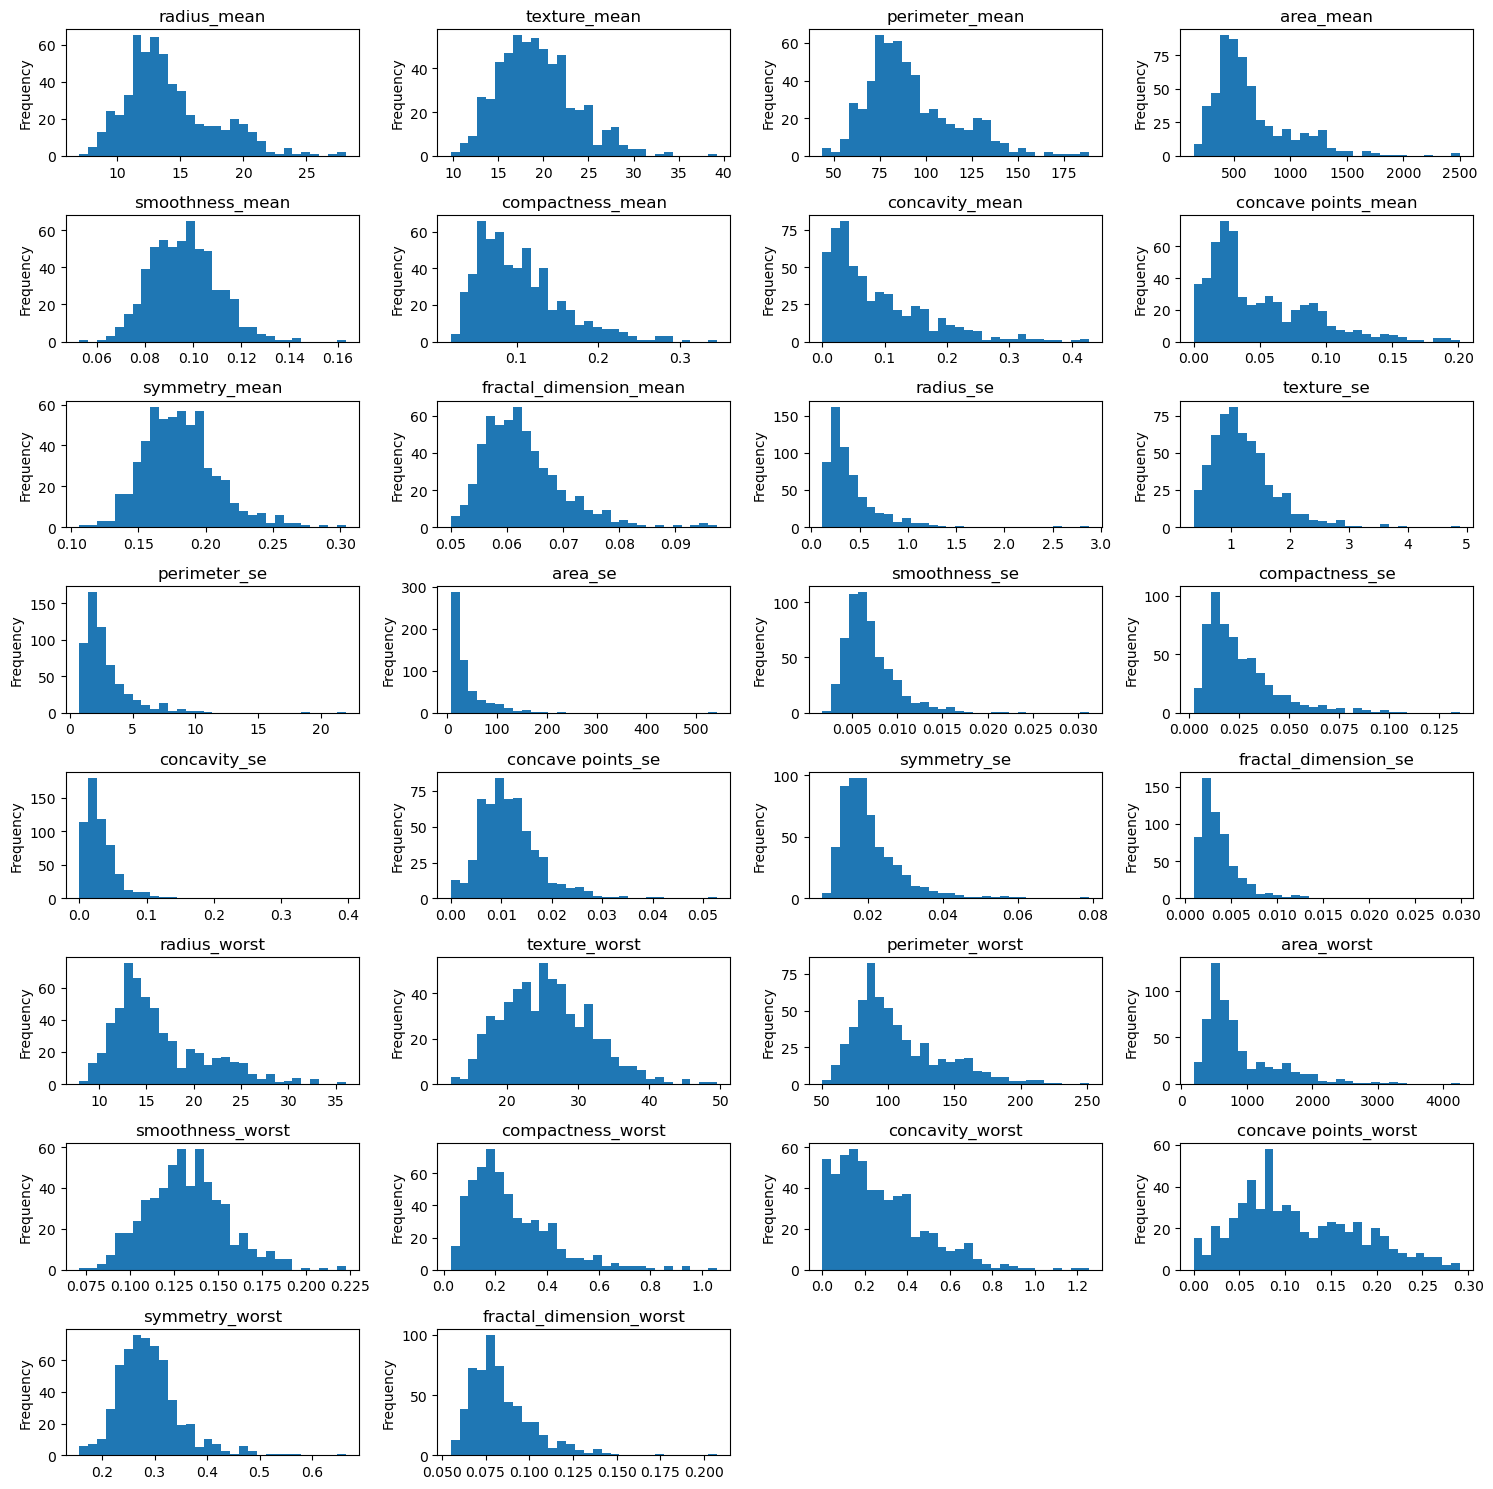

In [5]:
# check if the data is normally distributed.
num_cols = 4  # Number of columns in the grid
num_rows = (df.shape[1] - 1) // num_cols + 1  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))  # Adjust the figsize as needed

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over each column and plot the distribution
for i, col in enumerate(df.columns):
    ax = axes[i]  # Get the current axis
    df[col].plot(kind='hist', ax=ax, bins=30)  # Plot the histogram for the current column
    ax.set_title(col)  # Set the title for the subplot

# Hide any extra subplots
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

The data appears to be in good shape, so we can now apply PCA to cluster it.

In [6]:
# first scale the data.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# now use PCA to cluster
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

In [7]:
pca_df = pd.DataFrame(data= pca_df,columns=["PCA_1","PCA_2"])
pca_df["types"] = types # add the types for the color later


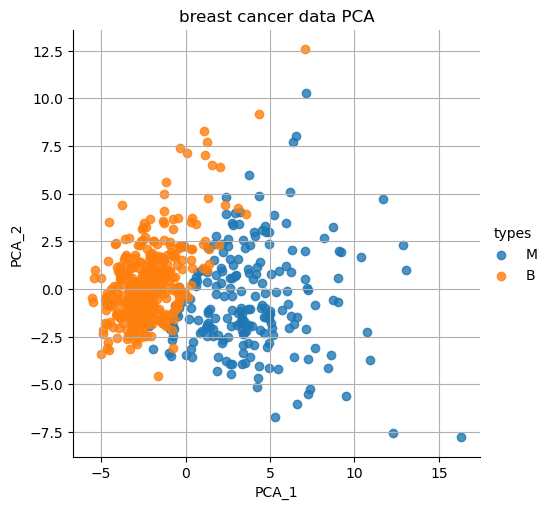

In [8]:
# plot the TSNE data 
sns.lmplot(
    x='PCA_1', 
    y='PCA_2', 
    data=pca_df, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('breast cancer data PCA')
plt.grid()
plt.show()

We see some overlap in the cancer types. we can try to improve the data by doing a t-SNE and a PCA 

In [9]:
pca = PCA(n_components=2)
PCA_tsne_cluster = pca.fit_transform(df_scaled)

tsne = TSNE(n_components=2,learning_rate="auto",init="random",random_state=42)
PCA_tsne_cluster = tsne.fit_transform(PCA_tsne_cluster)

# make a data frame out of the data
PCA_tsne_df = pd.DataFrame(data=PCA_tsne_cluster,columns=["X","Y"])
PCA_tsne_df["types"] = types # add the types for the color later

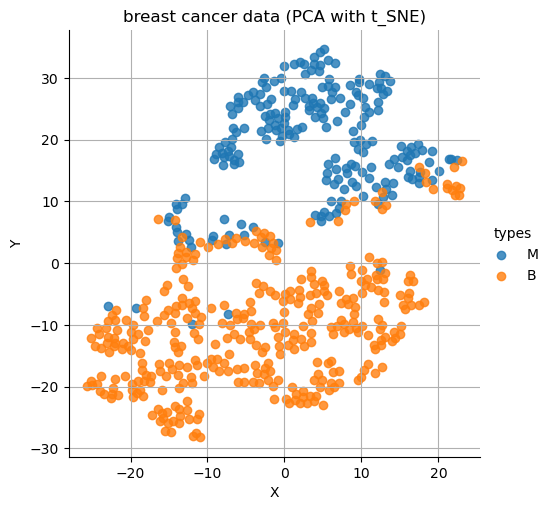

In [10]:
# plotting
# plot the TSNE data 
sns.lmplot(
    x='X', 
    y='Y', 
    data=PCA_tsne_df, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('breast cancer data (PCA with t_SNE)')
plt.grid()
plt.show()

Though it still isn't perfect, this looks better. Although a perfect cluster is not guaranteed, we can improve it by adjusting the settings for the t-SNE and PCA.

In [11]:
from sklearn.metrics import silhouette_score

# Load a sample dataset (e.g., Iris dataset)
# Define the parameter grid
param_grid = {
    'n_components': [2, 3],  # Number of dimensions in the embedded space
    'perplexity': [5, 30, 50],  # Perplexity parameter
    'learning_rate': [10, 100],  # Learning rate
    'n_iter': [1000, 2000]  # Number of iterations
}

# Create the t-SNE object
tsne = TSNE()

# Create the GridSearchCV object
grid_search = GridSearchCV(tsne, param_grid, scoring=silhouette_score, cv=5)  
# Adjust the scoring metric and cv parameter as needed

# Fit the GridSearchCV object to the data
grid_search.fit(PCA_tsne_cluster)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

/commons/conda/dsls/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/commons/conda/dsls/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/commons/conda/dsls/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
  File "/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 212, in silhouette_samples
    X, labels = check_X_y(X, labels, accept_sparse=["csc", "csr"])
  F

Best Hyperparameters:  {'learning_rate': 10, 'n_components': 2, 'n_iter': 1000, 'perplexity': 5}
Best Score:  nan


So above we have the parameters that we can use to optimise the parameters

In [12]:
tsne = TSNE(n_components=2,perplexity= 5,learning_rate= 10 ,init="pca", n_iter=1000 ,random_state=42)
PCA_tsne_cluster = tsne.fit_transform(PCA_tsne_cluster)

# make a data frame out of the data
PCA_tsne_df_optimise = pd.DataFrame(data=PCA_tsne_cluster,columns=["X","Y"])
PCA_tsne_df_optimise["types"] = types # add the types for the color later

/commons/conda/dsls/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


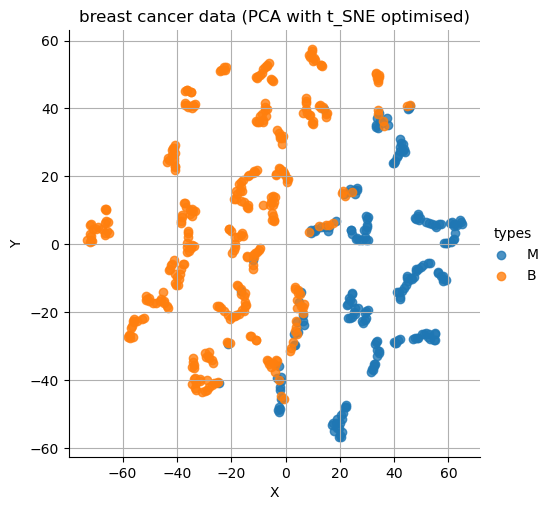

In [13]:
# plotting
# plot the TSNE data 
sns.lmplot(
    x='X', 
    y='Y', 
    data=PCA_tsne_df_optimise, 
    hue='types', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('breast cancer data (PCA with t_SNE optimised)')
plt.grid()
plt.show()


Simply tweaking the t-SNE's parameters. What we observe is that more groups have been added to the data. However, because the blue and orange dots continue to overlap, optimization wasn't very successful.
